In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import pandas as pd
import tensorflow as tf

In [2]:
testX = np.array(pd.read_csv("testX.csv"))
testY = np.array(pd.read_csv("testY.csv"))
trainX = np.array(pd.read_csv("trainX.csv"))
trainY = np.array(pd.read_csv("trainY.csv"))
trainY = trainY.reshape(470, )
trainY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [3]:
#calculate mean of all vectors

def calc_row_mean(data):
    ret = []
    
    for row in data:
        ret.append([np.sum(row) / len(row)])
    return np.array(ret)

x_mean = calc_row_mean(trainX)
print(x_mean.shape)

(470, 1)


In [4]:
#subtract
def subtract(d1, d2):
    return d1 - d2
x_train_adjust = subtract(trainX, x_mean)
x_train_adjust.shape

(470, 784)

In [5]:
def cov(r1, r2):
    total = 0
    for i in range(len(r1)):
        total += (r1[i]) * (r2[i]) # we can do this because the means of the rows are 0 so we don't subtract
    return total / (len(r1) - 1)

# This would be significantly faster with np.cov()
# takes approx. 30 seconds
def cov_matrix(data):
    ret = np.zeros((data.shape[0], data.shape[0]))
    
    for i in range(len(data)):
        for j in range(i, len(data)):
            store = cov(data[i], data[j])
            ret[i][j] = store
            ret[j][i] = store
    return ret
    
covariance_x = cov_matrix(x_train_adjust)
print(covariance_x.shape)

(470, 470)


In [6]:
def compute_eigen(data):
    return np.linalg.eig(data)

w, v = compute_eigen(covariance_x)
print(w.shape, v.shape)
v

(470,) (470, 470)


array([[-0.0329226 ,  0.08209517, -0.05979601, ...,  0.01304461,
        -0.14027563, -0.00952454],
       [-0.0422668 ,  0.00602577, -0.01624624, ..., -0.02103945,
         0.01987364, -0.03956524],
       [-0.02336335,  0.03949967, -0.01724839, ..., -0.07829849,
        -0.09156739, -0.01303523],
       ...,
       [-0.04817754, -0.10212566,  0.0143339 , ..., -0.00042441,
        -0.05236829,  0.01292435],
       [-0.04746292, -0.11820595, -0.03320124, ...,  0.04482181,
         0.04990017, -0.03913467],
       [-0.05787038, -0.1156619 , -0.02657111, ...,  0.05353318,
        -0.05729032, -0.04328791]])

Text(0, 0.5, 'Eigenvlaue')

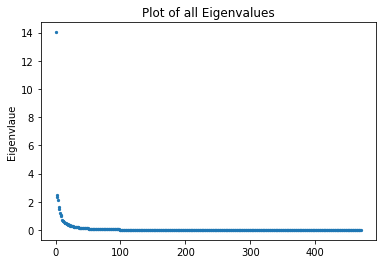

In [7]:
plt.scatter(np.arange(1, 471, 1), w, s=5)
plt.title("Plot of all Eigenvalues")
plt.ylabel("Eigenvlaue")

In [8]:
v[:,:10].shape

(470, 10)

Text(0, 0.5, 'Accumilated Data Variance')

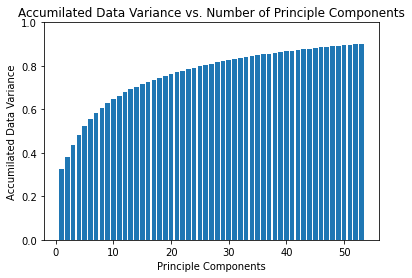

In [9]:
def eigen_target(eigenvals, target):
    total = np.sum(eigenvals)
    count = 0
    ret = []
    for e in eigenvals:
        count += e
        ret.append(count/total)
        if count/total > target:
            break
    return ret
eigen_90 = eigen_target(w, 0.9)
plt.bar(np.arange(1, len(eigen_90)+1, 1), eigen_90)
plt.ylim(0, 1)
plt.title("Accumilated Data Variance vs. Number of Principle Components")
plt.xlabel("Principle Components")
plt.ylabel("Accumilated Data Variance")

In [10]:
def back_2_original(data, eigenvectors, num_eigens):
    eigens = eigenvectors[:,:num_eigens]
    A_swiggle = np.dot(data.T, eigens) #(784, 10)
    original = np.dot(A_swiggle, eigens.T).T
    return original
    

PCA_10_x_train = back_2_original(x_train_adjust, v, 53)

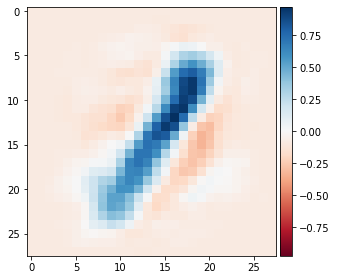

In [14]:
image1 = np.reshape(PCA_10_x_train[0], (28, 28))
imshow(image1)

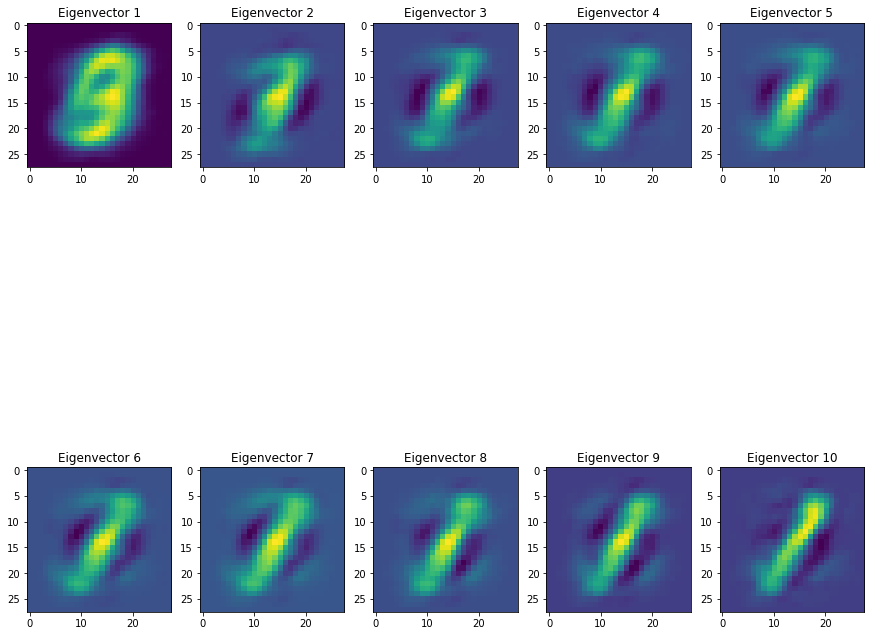

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(15, 15))
for i in range(1, 11):
    PCA_10_x_train = back_2_original(x_train_adjust, v, i)
    image = np.reshape(PCA_10_x_train[0], (28, 28))
    ax[int((i-1)/5)][int((i-1)%5)].imshow(image)
    ax[int((i-1)/5)][int((i-1)%5)].set_title("Eigenvector {}".format(i))
    

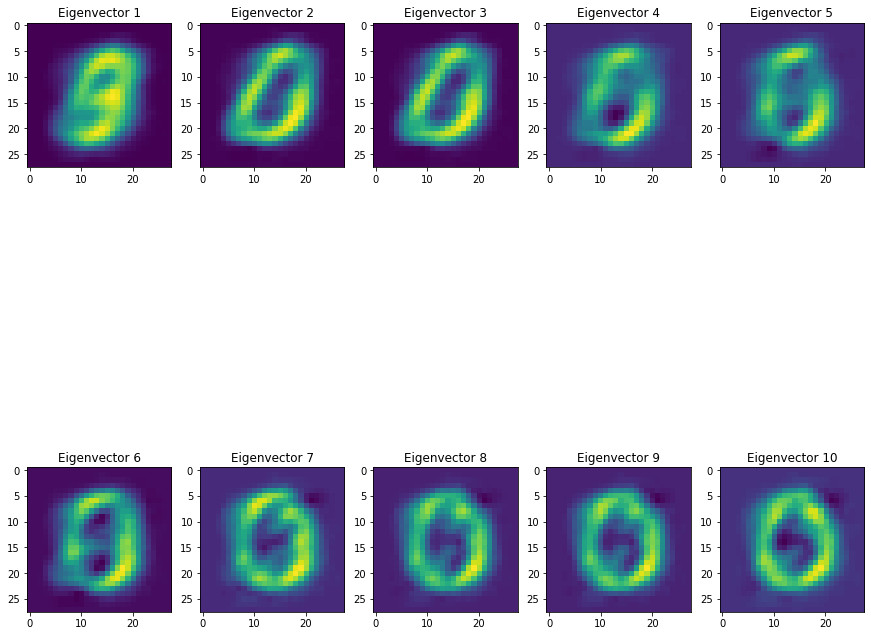

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(15, 15))
for i in range(1, 11):
    PCA_10_x_train = back_2_original(x_train_adjust, v, i)
    image = np.reshape(PCA_10_x_train[376], (28, 28))
    ax[int((i-1)/5)][int((i-1)%5)].imshow(image)
    ax[int((i-1)/5)][int((i-1)%5)].set_title("Eigenvector {}".format(i))
    